<a href="https://colab.research.google.com/github/leonardoLavagna/PyTorch-Notebooks/blob/main/Notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Notebook 2
## Gradients, Optimizers and Loss Functions
In this notebook we will introduce three fundamental concepts: gradients, optimizers and loss functions in Pytorch. 

## Gradients

In [1]:
import torch

We start by creating a random tensor, with the fundamental parameter `requires_grad` set to `True`, see: https://pytorch.org/docs/stable/generated/torch.Tensor.requires_grad.html. The main reason to specify this parameter has to do with how PyTorch calculates the gradients. In particular with this parameter se to `True` PyTorch will create a function that will be used in the back-propagation.

Recall that by the chain rule, if we have $z=f(g(x))$ with $y=g(x)$, then the gradient (derivative) is calculated "backwards" since $z'=f'(g(x))g'(x)$. In practice we have $x\to y=f(x)\to z=g(y)$ for the "forward pass" and $\frac{dz}{dy}\to \frac{dz}{dy}\frac{dy}{dx}\to z'$ for the "backward pass". 

In [2]:
x = torch.randn(3, requires_grad=True)
print(x)

tensor([-0.4491, -0.0873, -0.0493], requires_grad=True)


For example if we compute $y = 2x$ we see that the function `MulBackward` as been created and stored (`MulBackward` is for multiplication, if we compute $y=x+2$ an `AddBackward` function will be created, and so on...).

In [3]:
# y = f(x) with f : x --> 2x
# z = g(y) with g : y --> y+1
y = 2*x
z = y+1
print(y)
print(z)

tensor([-0.8983, -0.1746, -0.0985], grad_fn=<MulBackward0>)
tensor([0.1017, 0.8254, 0.9015], grad_fn=<AddBackward0>)


In [4]:
# Example of gradient calculation
# Note : we need to operate with scalars
w = z.mean()
print(f"tensor w={w} with dimension {w.ndim}")
w.backward()
gradient = x.grad
print(f"Gradient of w: {gradient}") 

tensor w=0.6095460653305054 with dimension 0
Gradient of w: tensor([0.6667, 0.6667, 0.6667])


**Reamrk .** It can happen that a mistake is made in the gradient calculation, say for example one writes by mistake `x.grad()` instead of `x.grad`. In this case if in the back-propagation process some values have been already stored, then a runtime error can occur. In this case it should suffice to restart the kernel, correct the mistake, and run again the cells. Another option can be to do not keep track of history (see below).

In [5]:
# do not keep track of history
# 1) x.requires_grad_(False)
# 2) x.detach()
# 3) with torch.no_grad()
# e.g.
x.requires_grad_(False)

tensor([-0.4491, -0.0873, -0.0493])

## Loss functions and Optimizers
Graidents play a central role in defining Machine Learning/Deep Learning models, in particulare when dealing with:


*   Loss functions (minimization of the loss), see https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23
*   Optimizers, see: https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6

We will not discuss in detail these concepts, but we will frequently use them in this series of notebooks. 

## A dummy model
Let's see an important application of the concepts we've seen in practice. We will implement a dummy model in two different ways: manually using `numpy` and automatically using PyTorch. Here we see a classic Macine Learning/Deep Learning pipeline: 


1.   Get the data;
2.   Define the model and choose an optimizer and a loss function;
3.   Fit the data to the model and make inference, in particular:
     *   Create a training loop;
     *   Create a testing loop if necessary.

Our dummy model consists of a simple vector $X$, a function $Y=f(X)=2X$ and we want to predict the value $f(5)$ without computing $y=2\cdot 5=10$. 

In [6]:
import numpy as np

# Get the data
X = np.array([1,2,3,4])
# Y = 2*X
Y = np.array([2,4,6,8]) 
# weights
W = 0.0

In [7]:
# Model definition
def forward(x):
    return W*x
# loss function
def loss(y,y_predicted):
    return((y_predicted-y)**2).mean()
# optimizer (gradient descent)
# MSE = 1/N * (w*x-y)^2
# MSE derivative = 1/N*2x(w*x-y)
def gradient(x,y,y_predicted):
    return np.dot(2*x,y_predicted-y).mean()

print(f"Prediction before training f(5)= {forward(5)}")

Prediction before training f(5)= 0.0


In [8]:
# Training loop
# learning rate
lr = 0.01
# number of epochs
n_iters = 10
for epoch in range(n_iters):
    # prediction
    y_pred = forward(X)
    # loss
    l = loss(Y,y_pred)
    # optimizer
    dw = gradient(X,Y,y_pred)
    # update
    W -= lr*dw

    # Print what's happening every epoch
    if epoch % 1 == 0:
        print(f"epoch {epoch+1}: w = {w}, loss = {l}")

epoch 1: w = 0.6095460653305054, loss = 30.0
epoch 2: w = 0.6095460653305054, loss = 4.800000000000001
epoch 3: w = 0.6095460653305054, loss = 0.7680000000000002
epoch 4: w = 0.6095460653305054, loss = 0.12288000000000023
epoch 5: w = 0.6095460653305054, loss = 0.019660800000000138
epoch 6: w = 0.6095460653305054, loss = 0.0031457280000000165
epoch 7: w = 0.6095460653305054, loss = 0.0005033164799999944
epoch 8: w = 0.6095460653305054, loss = 8.053063680000391e-05
epoch 9: w = 0.6095460653305054, loss = 1.2884901887999318e-05
epoch 10: w = 0.6095460653305054, loss = 2.061584302080135e-06


In [9]:
print(f"prediction after training f(5)={forward(5)}")

prediction after training f(5)=9.998951424


In [10]:
# Same as before, but automatically with PyTorch
# To carry out the model the following module is needed
import torch.nn as nn

# Data
X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

# Model
X_test = torch.tensor([5], dtype=torch.float32)
samples , features = X.shape
print(samples, features)

input_size = features
output_size = features
model = nn.Linear(input_size, output_size)

# Loss and optimizer (Stochastic Gradient Descent)
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

print(f"Prediction before training f(5)= {model(X_test).item()}")

# Training
lr = 0.01
n_iters = 10
for epoch in range(n_iters):
    # Prediction
    y_pred = model(X)
    # Loss
    l = loss(Y,y_pred)
    # gradients
    l.backward() 
    # Update
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 1 == 0:
        [w,b] = model.parameters()
        print(f"epoch {epoch+1}: w = {w[0][0].item()}, loss = {l}")
  
print(f"Prediction before training f(5)= {model(X_test).item()}")

4 1
Prediction before training f(5)= 0.453784704208374
epoch 1: w = 0.28903692960739136, loss = 25.857940673828125
epoch 2: w = 0.5210843086242676, loss = 17.98900032043457
epoch 3: w = 0.714539110660553, loss = 12.528627395629883
epoch 4: w = 0.8758460879325867, loss = 8.73951530456543
epoch 5: w = 1.010373592376709, loss = 6.11005163192749
epoch 6: w = 1.1225935220718384, loss = 4.28524923324585
epoch 7: w = 1.216230869293213, loss = 3.0187840461730957
epoch 8: w = 1.2943885326385498, loss = 2.139739513397217
epoch 9: w = 1.3596513271331787, loss = 1.5295201539993286
epoch 10: w = 1.4141722917556763, loss = 1.105833649635315
Prediction before training f(5)= 7.91689395904541


## Exercises


1.   Create some data points using the following code.

In [11]:
from sklearn import datasets
X_np, y_np = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

2.   Convert `X_np` and `y_np` to tensors `X` and `y` with data type `float32` , and then create two variables `n_samples` and `n_features` with the dimensions of `X`.

In [12]:
# Solution of 2.
X_np, y_np = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))
y = y.view(y.shape[0],1)

n_samples, n_features = X.shape

3.    Design a linear model (input, output size, foreward method) for the data. Then choose a suitable loss function, a suitable optimizer and a learning rate.

In [13]:
# Solution of 3.
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)
criterion = nn.MSELoss()
lr = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr =lr)

4.    Define a training loop (forward pass, backward pass, update) and plot the results.

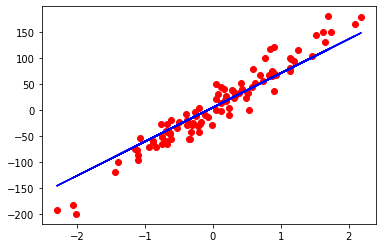

In [14]:
# Solution of 4.
import matplotlib.pyplot as plt

n_epochs = 100
for epoch in range(n_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    
    # reset at each iteration
    optimizer.zero_grad()
    
    # print
    #if (epoch+1) % 10 == 0:
        #print(f"epoch = {epoch+1}, loss = {loss.item()}")

# plot
predicted = model(X).detach().numpy()
plt.plot(X_np, y_np, "ro")
plt.plot(X_np, predicted, "b")
plt.show()

5.   What is the difference between the technique developed in the previous points and the well known linear regression?